In [1]:
# Import các thư viện cần thiết
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist


#Bước 2: Khởi tạo ngẫu nhiên các tâm cụm 
Với số lượng tâm cụm k ngẫu nhiên, tạo 1 kích thước (k, n_features) lưu các tâm cụm

In [2]:
# Hàm khởi tạo các tâm cụm ban đầu
def init_centroids(X, k):
    # Lấy số lượng mẫu và số lượng đặc trưng từ dữ liệu 
    n_samples, n_features = X.shape
    # Khởi tạo mảng centroids có kích thước (k, n_features)
    centroids = np.zeros((k, n_features))
    for i in range(k):
        # Chọn ngẫu nhiên một điểm dữ liệu làm tâm cụm
        centroid = X[np.random.choice(range(n_samples))]
        # Gán điểm dữ liệu vừa chọn làm tâm cụm thứ i
        centroids[i] = centroid
    # Trả về mảng các gía trị tâm cụm
    return centroids

# Bước 3: Gán mỗi điểm dữ liệu vào trung tâm cụm gần nhất
Tính toán khoảng cách từ mỗi điểm dữ liệu đến các tâm cụm, sau đó so sánh lấy giá trị nhỏ nhất của khoảng cách --> gán điểm dữ liệu vào tâm cụm 

In [3]:
# Gán mỗi điểm dữ liệu vào tâm cụm gần nhất
def closest_centroid(X, centroids):
    # Tính khoảng cách từ mỗi điểm dữ liệu đến các tâm cụm
    distance = cdist(X, centroids, 'euclidean')
    # Trả về chỉ số tâm cụm gần nhất cho từng điểm dữ liệu
    return np.argmin(distance, axis=1)

# Bước 4: Cập nhật lại tâm cụm mới
Tâm cụm mới được tính bằng trung bình cộng của các điểm trong cụm

In [4]:
# Cập nhật tâm cụm
def update_centroids(X, labels, k):
    # Lấy số lượng đặc trưng từ dữ liệu X
    n_features = X.shape[1]
    # Khởi tạo mảng centroids có kích thước (k, n_features) với các giá trị ban đầu là 0
    centroids = np.zeros((k, n_features))
    for i in range(k):
        # Lấy các điểm dữ liệu thuộc cụm thứ i
        points = X[labels == i]
        if len(points) > 0:
        # Tính trung bình các điểm dữ liệu thuộc cụm thứ i và gán giá trị này làm tâm cụm mới
            centroids[i] = points.mean(axis=0)
    # Trả về mảng chứa các tâm cụm đã được cập nhật
    return centroids

In [ ]:
# Thuật toán Kmeans hoàn chỉnh

In [5]:
# Định nghĩa hàm kmeans
def kmeans(X, k, max_iters=100):
    # Khởi tạo các tâm cụm ban đầu
    centroids = init_centroids(X, k)
    # Lặp tối đa max_iters
    for _ in range(max_iters):
        # Gán mỗi điểm dữ liệu vào cụm gần nhất
        labels = closest_centroid(X, centroids)
        # Cập nhật các tâm cụm
        new_centroids = update_centroids(X, labels, k)
        # Kiểm tra xem các tâm cụm có thay đổi hay không, nếu không đổi dừng vòng lặp
        if np.all(centroids == new_centroids):
            break
        # Cập nhật các tâm cụm mới
        centroids = new_centroids
    # Trả về các tâm cụm và nhãn của các điểm dữ liệu
    return centroids, labels

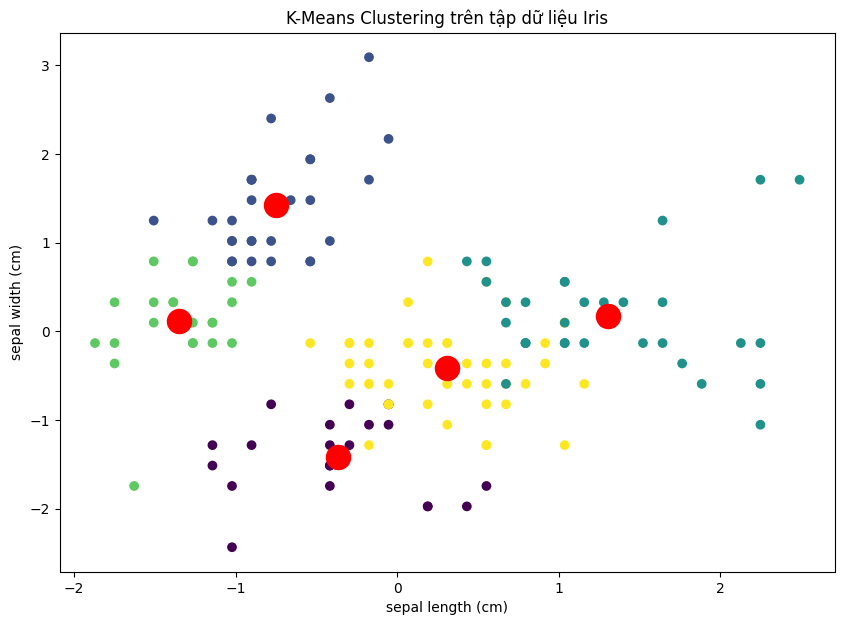

In [8]:
# Áp dụng K-Means trên tập dữ liệu Iris

# Nạp dữ liệu 
iris = load_iris()
X = iris.data

# Chuẩn hoá dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Áp dụng Kmeans
k = 5
# Áp dụng thuật toán Kmeans để tìm các tâm cụm và nhãn của các điểm dữ liệu
centroids, labels = kmeans(X_scaled, k)

# Hiển thị kết quả phân cụm
plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-Means Clustering trên tập dữ liệu Iris')
plt.show()


